In [1]:
import sys
import os
import logging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

msg_format = "%(asctime)s|%(levelname)s|%(filename)s:%(lineno)d| %(message)s"
date_format = "%d-%b-%y %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=msg_format, datefmt=date_format, stream=sys.stdout)

pwd = os.getcwd()
module_path = f"{pwd}\..\src"
sys.path.insert(0, module_path)

from datetime import datetime, timedelta
from hostelprices.scrape_web import ScrapeWeb
from hostelprices.utils import Utils, Defs 
from hostelprices.database import Database
from hostelprices.analysis import HostelDF

%load_ext autoreload
%autoreload 2

In [12]:
client_id = Utils.fromConfig('mongo_client')
data_base_name = Utils.fromConfig('data_base_name')
#collection_name = "main_coll--main-12_30_2022-08_22"
#collection_name = "main_coll-longterm00-dev-01_03_2023-12_21"

DB = Database(
    client_id=client_id, data_base_name=data_base_name#, collection_name=collection_name
    )
DB.filterCollections(contains='-main-longterm00-')#'-main-'

In [13]:
df_all = DB.getPandasDf()
df_all

ValueError: No objects to concatenate

In [ ]:
hdf = HostelDF(df_all)
hdf

,_id,price (EUR),rating,distance (km),city,date from,duration (days),request time,collection,collection time,days before,rating per price
0,63b54c637faf2b85248ab478,17.069701,9.3,0.5,Lisbon,2023-01-05 08:48:35.395,1,2023-01-04 08:49:13.683,main_coll-longterm00-main-01_04_2023-08_48,2023-01-04 08:48:00,1.000410,0.544825
0,63ac5f9a79c3e0781c5cb40a,33.885542,9.7,0.5,Lisbon,2022-12-29 15:16:40.160,1,2022-12-28 15:17:48.755,main_coll-longterm00-main-12_28_2022-15_16,2022-12-28 15:16:00,1.000465,0.286258
0,63ac43807a8ad15cb66a9c11,33.885542,9.7,0.5,Lisbon,2022-12-29 13:17:02.482,1,2022-12-28 13:18:01.572,main_coll-longterm00-dev-12_28_2022-13_17,2022-12-28 13:17:00,1.000029,0.286258
0,63ac4a666139a5bd87770667,33.885542,9.7,0.5,Lisbon,2022-12-29 13:46:41.066,1,2022-12-28 13:47:25.820,main_coll-longterm00-dev-12_28_2022-13_46,2022-12-28 13:46:00,1.000475,0.286258
0,63ac49a88dee83084c5d6d95,33.885542,9.7,0.5,Lisbon,2022-12-29 13:42:18.781,1,2022-12-28 13:43:08.100,main_coll-longterm00-dev-12_28_2022-13_42,2022-12-28 13:42:00,1.000217,0.286258
...,...,...,...,...,...,...,...,...,...,...,...,...
2146,63b6a326f291b978b64519e9,17.926219,8.8,1.1,Seville,2023-01-24 08:48:44.999,5,2023-01-05 10:14:47.335,main_coll-longterm00-main-01_05_2023-08_48,2023-01-05 08:48:00,19.000521,0.490901
2146,63b54c637faf2b85248abcc2,14.224751,6.9,1.2,Seville,2023-01-23 08:48:35.395,5,2023-01-04 09:52:25.142,main_coll-longterm00-main-01_04_2023-08_48,2023-01-04 08:48:00,19.000410,0.485070
2147,63b6a326f291b978b64519ea,4.320000,9.0,1.1,Seville,2023-01-24 08:48:44.999,5,2023-01-05 10:14:47.335,main_coll-longterm00-main-01_05_2023-08_48,2023-01-05 08:48:00,19.000521,2.083333
2148,63b6a326f291b978b64519eb,17.926219,7.8,1.2,Seville,2023-01-24 08:48:44.999,5,2023-01-05 10:14:47.335,main_coll-longterm00-main-01_05_2023-08_48,2023-01-05 08:48:00,19.000521,0.435117


In [45]:
l = ['main_coll_', 'dev', '12_28_202213_17']
isinstance(l[0], str)

True

In [54]:
from hostelprices.database import CollectionName

def test_column_name():
    cn = CollectionName(title='test')
    assert(len(cn.split('-')==4))

    with self.assertRaises(AttributeError):
        cn = CollectionName(full_name='test')

    cn = CollectionName(full_name='main_coll--dev-12_28_2022-13_17')
    
    cn = CollectionName(full_name='main_coll-testname-dev-12_28_2022-13_17')

    
    

In [14]:
print(hdf.city.value_counts())
print(hdf["collection time"].value_counts())
print(f'n dates_from: {len(hdf[Defs.colName("date_from")].value_counts())}')
print(f'n times_before: {len(hdf[Defs.colName("time_before")].value_counts())}')
print(hdf[Defs.colName('duration')].value_counts())

Lisbon     5524
Seville    3096
Name: city, dtype: int64
2023-01-05 08:48:00    2150
2023-01-04 08:48:00    2147
2023-01-03 12:21:00    2143
2022-12-28 15:16:00     222
2022-12-28 14:27:00     222
2022-12-28 13:46:00     221
2022-12-28 13:08:00     220
2022-12-28 13:17:00     219
2022-12-28 13:42:00     219
2022-12-28 13:04:00     217
2022-12-28 12:56:00     217
2022-12-28 14:33:00     217
2022-12-29 15:16:00     206
Name: collection time, dtype: int64
n dates_from: 77
n times_before: 77
5    4362
1    4258
Name: duration (days), dtype: int64


In [6]:
hdf_sel = hdf.filter(
    (hdf[Defs.colName('city')]=='Lisbon') & \
    #& (hdf[Defs.colName('date_from')]=='2023-01-13') & \
    (hdf[Defs.colName('distance')]<10) & (hdf[Defs.colName('rating')]>5) 
    #& (hdf[Defs.colName('duration')]==5)
    )
len(hdf_sel)

5380

In [7]:
hdf_sel["collection time"].value_counts().index

DatetimeIndex(['2023-01-04 08:48:00', '2023-01-05 08:48:00',
               '2023-01-03 12:21:00', '2022-12-28 15:16:00',
               '2022-12-28 14:27:00', '2022-12-28 13:46:00',
               '2022-12-28 13:42:00', '2022-12-28 13:17:00',
               '2022-12-28 13:08:00', '2022-12-28 14:33:00',
               '2022-12-28 12:56:00', '2022-12-28 13:04:00',
               '2022-12-29 15:16:00'],
              dtype='datetime64[ns]', freq=None)

In [8]:
print(hdf_sel.city.value_counts())
print(hdf_sel["collection time"].value_counts())
print(hdf_sel[Defs.colName('date_from')].value_counts())
print(hdf_sel[Defs.colName('time_before')].value_counts())
print(hdf_sel[Defs.colName('duration')].value_counts())

Lisbon    5380
Name: city, dtype: int64
2023-01-04 08:48:00    1371
2023-01-05 08:48:00    1370
2023-01-03 12:21:00    1368
2022-12-28 15:16:00     130
2022-12-28 14:27:00     130
2022-12-28 13:46:00     129
2022-12-28 13:42:00     129
2022-12-28 13:17:00     128
2022-12-28 13:08:00     128
2022-12-28 14:33:00     128
2022-12-28 12:56:00     127
2022-12-28 13:04:00     126
2022-12-29 15:16:00     116
Name: collection time, dtype: int64
2023-01-07 08:48:35.395    75
2023-01-22 12:21:49.129    75
2023-01-22 08:48:35.395    75
2023-01-07 12:21:49.129    75
2023-01-21 08:48:44.999    74
                           ..
2022-12-29 13:46:41.066    63
2022-12-29 13:04:16.333    62
2022-12-29 13:17:02.482    62
2022-12-30 15:16:39.063    59
2022-12-31 15:16:39.063    57
Name: date from, Length: 77, dtype: int64
3.000410     75
19.000569    75
18.000410    75
4.000569     75
16.000521    74
             ..
1.000475     63
1.000189     62
1.000029     62
1.000452     59
2.000452     57
Name: days b

c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


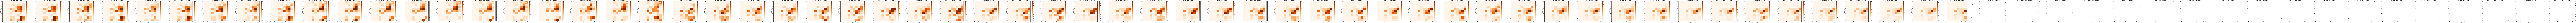

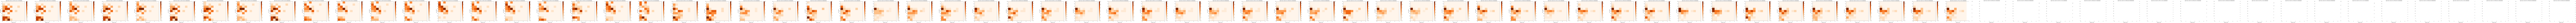

In [9]:
_ = hdf_sel.plot(
    x=Defs.colName('rating'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(4,10), ylim=(0,40), nbins=10
    )
_ = hdf_sel.plot(
    x=Defs.colName('distance'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(0,5), ylim=(0,40), nbins=10
    )

c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


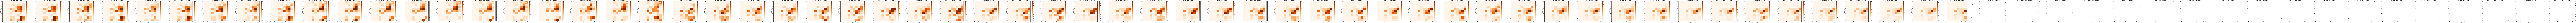

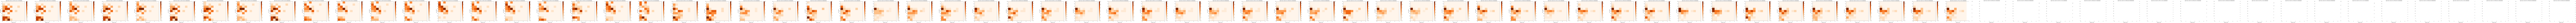

In [10]:
_ = hdf_sel.plot(
    x=Defs.colName('rating'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(4,10), ylim=(0,40), nbins=10
    )
_ = hdf_sel.plot(
    x=Defs.colName('distance'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(0,5), ylim=(0,40), nbins=10
    )

In [11]:
def processed_values_plot(axs, hdf, city='Lisbon', date_from='2023-01-13', max_dist=5, min_rating=5, duration=5, label=None):
    hdf_new = hdf.filter(
        (hdf[Defs.colName('city')]==city) & (hdf[Defs.colName('date_from')]==date_from) & \
        (hdf[Defs.colName('distance')]<max_dist) & (hdf[Defs.colName('rating')]>min_rating) & \
        (hdf[Defs.colName('duration')]==duration)
        )
    time_before, avg_price, n_hostels = hdf_new.cummulated()
    axs[0].plot(time_before, avg_price, label=label)
    axs[0].set_xlabel('days before')
    axs[0].set_ylabel('lowest price')
    axs[1].plot(time_before, n_hostels, label=label)
    axs[1].set_xlabel('days before')
    axs[1].set_ylabel('number of hostels')

IndexError: index 0 is out of bounds for axis 0 with size 0

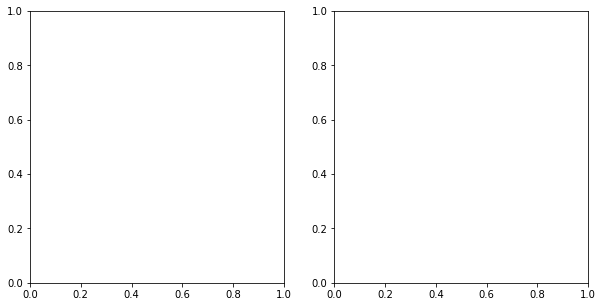

In [12]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,5)
processed_values_plot(axs, hdf_sel, duration=5, label='min_rating=5')
processed_values_plot(axs, hdf_sel, duration=5, min_rating=9, label='min_rating=9')
plt.legend()
fig.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

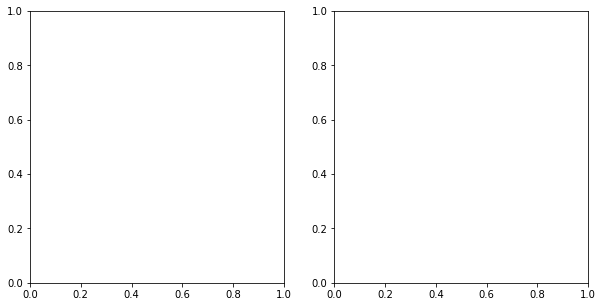

In [13]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,5)
processed_values_plot(axs, hdf_sel, duration=1, label='min_rating=5')
processed_values_plot(axs, hdf_sel, duration=1, min_rating=9, label='min_rating=9')
plt.legend()
fig.show()